In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.tsa.api as smt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('Sales_Data.csv')

In [3]:
data

,Date,Particulars,Name,Vch Type,Vch No.,Debit,Credit
0,01-04-2019,By,customer1,Sales,1,NaN,15040.00
1,NaN,NaN,Item_1,200 Pcs,20.00/Pcs,4000.0,NaN
2,NaN,NaN,Item_2,160 Pcs,28.00/Pcs,4480.0,NaN
3,NaN,NaN,Item_3,12 Pcs,60.00/Pcs,720.0,NaN
4,NaN,NaN,Item_3,15 Pcs,35.00/Pcs,525.0,NaN
...,...,...,...,...,...,...,...
2715,NaN,NaN,Item_33,123.40 MTR,30.00/MTR,3702.0,NaN
2716,NaN,NaN,Item_7,220.00 MTR,23.00/MTR,5060.0,NaN
2717,NaN,NaN,NaN,NaN,NaN,NaN,13467165.81
2718,NaN,To,Closing Balance,13467165.81,NaN,NaN,NaN


In [4]:
# Creating a new df
df_cols = ['Date', 'Customer_Name' , 'Item_Name', 'Vrh_No', 'Quantity', 'Price_per_unit', 'Amount']
df = pd.DataFrame(columns=df_cols)

In [5]:
# Filling nan values in date column
df['Date'] = data['Date'].ffill(axis = 0)

In [6]:
# Dropping last 3 rows
data.drop(index=data.index[-3:],axis=0,inplace=True)
data

,Date,Particulars,Name,Vch Type,Vch No.,Debit,Credit
0,01-04-2019,By,customer1,Sales,1,NaN,15040.0
1,NaN,NaN,Item_1,200 Pcs,20.00/Pcs,4000.0,NaN
2,NaN,NaN,Item_2,160 Pcs,28.00/Pcs,4480.0,NaN
3,NaN,NaN,Item_3,12 Pcs,60.00/Pcs,720.0,NaN
4,NaN,NaN,Item_3,15 Pcs,35.00/Pcs,525.0,NaN
...,...,...,...,...,...,...,...
2712,05-02-2021,By,customer129,Sales,333,NaN,8670.0
2713,NaN,NaN,Item_2,340 Pcs,25.50/Pcs,8670.0,NaN
2714,05-02-2021,By,customer16,Sales,334,NaN,8762.0
2715,NaN,NaN,Item_33,123.40 MTR,30.00/MTR,3702.0,NaN


In [7]:
# Obtaining row index where name column contains customer name
customer_ind = data[data['Name'].str.contains(r'customer')].index
customer_ind = list(customer_ind)

In [8]:
# Obtaining customer name values
customer_val = data['Name'][data['Name'].str.contains(r'customer')].values
customer_val = list(customer_val)

In [9]:
# Creating a dictionary of customer name index and customer name value
customer = dict(map(lambda i,j : (i,j) , customer_ind,customer_val))

In [10]:
# customer_name column with customer name values
for x, y in customer.items():
    df.at[x,'Customer_Name']=y

In [11]:
# Filling nan values
df['Customer_Name'] = df['Customer_Name'].ffill(axis = 0)

In [12]:
df

,Date,Customer_Name,Item_Name,Vrh_No,Quantity,Price_per_unit,Amount
0,01-04-2019,customer1,NaN,NaN,NaN,NaN,NaN
1,01-04-2019,customer1,NaN,NaN,NaN,NaN,NaN
2,01-04-2019,customer1,NaN,NaN,NaN,NaN,NaN
3,01-04-2019,customer1,NaN,NaN,NaN,NaN,NaN
4,01-04-2019,customer1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2715,05-02-2021,customer16,NaN,NaN,NaN,NaN,NaN
2716,05-02-2021,customer16,NaN,NaN,NaN,NaN,NaN
2717,05-02-2021,customer16,NaN,NaN,NaN,NaN,NaN
2718,05-02-2021,customer16,NaN,NaN,NaN,NaN,NaN


In [13]:
# Obtaining row index where name column contains item name
item_ind = data[data['Name'].str.contains(r'Item')].index
item_ind = list(item_ind)

In [14]:
# Obtaining item name values
item_val = data['Name'][data['Name'].str.contains(r'Item')].values
item_val = list(item_val)

In [15]:
len(item_ind)

1957

In [16]:
len(item_val)

1957

In [17]:
# Creating a dictionary of item name index and item name value
item = dict(map(lambda i,j : (i,j) , item_ind,item_val))

In [18]:
# item_name column with item name values
for x, y in item.items():
    df.at[x,'Item_Name']=y

In [19]:
df

,Date,Customer_Name,Item_Name,Vrh_No,Quantity,Price_per_unit,Amount
0,01-04-2019,customer1,NaN,NaN,NaN,NaN,NaN
1,01-04-2019,customer1,Item_1,NaN,NaN,NaN,NaN
2,01-04-2019,customer1,Item_2,NaN,NaN,NaN,NaN
3,01-04-2019,customer1,Item_3,NaN,NaN,NaN,NaN
4,01-04-2019,customer1,Item_3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2715,05-02-2021,customer16,Item_33,NaN,NaN,NaN,NaN
2716,05-02-2021,customer16,Item_7,NaN,NaN,NaN,NaN
2717,05-02-2021,customer16,NaN,NaN,NaN,NaN,NaN
2718,05-02-2021,customer16,NaN,NaN,NaN,NaN,NaN


In [20]:
# Obtaining vch no for each customer
vch_no=[]
for i in customer_ind:
    vch_no.append(data.iloc[i]['Vch No.'])

In [21]:
# Creating a dictionary of customer name index and vch no value
vch = dict(map(lambda i,j : (i,j) ,customer_ind,vch_no))

In [22]:
# Vrh_No column with vrh no. values
for x, y in vch.items():
    df.at[x,'Vrh_No']=y

In [23]:
# Filling nan values
df['Vrh_No'] = df['Vrh_No'].ffill(axis = 0)

In [24]:
df.head(10)

,Date,Customer_Name,Item_Name,Vrh_No,Quantity,Price_per_unit,Amount
0,01-04-2019,customer1,NaN,1,NaN,NaN,NaN
1,01-04-2019,customer1,Item_1,1,NaN,NaN,NaN
2,01-04-2019,customer1,Item_2,1,NaN,NaN,NaN
3,01-04-2019,customer1,Item_3,1,NaN,NaN,NaN
4,01-04-2019,customer1,Item_3,1,NaN,NaN,NaN
5,01-04-2019,customer1,Item_3,1,NaN,NaN,NaN
6,01-04-2019,customer1,Item_3,1,NaN,NaN,NaN
7,01-04-2019,customer1,Item_4,1,NaN,NaN,NaN
8,01-04-2019,customer1,Item_4,1,NaN,NaN,NaN
9,01-04-2019,customer1,Item_4,1,NaN,NaN,NaN


In [25]:
df['Quantity'] = data['Vch Type'].apply(lambda x: x.split(' ')[0])
df['Price_per_unit'] = data['Vch No.'].apply(lambda x: x.split('/')[0])

In [26]:
df['Quantity'] = pd.to_numeric(df['Quantity'],errors='coerce')
df['Price_per_unit'] = pd.to_numeric(df['Price_per_unit'],errors='coerce')

In [27]:
df['Amount'] = df['Quantity'] * df['Price_per_unit']

In [28]:
df.head(5)

,Date,Customer_Name,Item_Name,Vrh_No,Quantity,Price_per_unit,Amount
0,01-04-2019,customer1,NaN,1,NaN,1.0,NaN
1,01-04-2019,customer1,Item_1,1,200.0,20.0,4000.0
2,01-04-2019,customer1,Item_2,1,160.0,28.0,4480.0
3,01-04-2019,customer1,Item_3,1,12.0,60.0,720.0
4,01-04-2019,customer1,Item_3,1,15.0,35.0,525.0


In [29]:
df.tail(5)

,Date,Customer_Name,Item_Name,Vrh_No,Quantity,Price_per_unit,Amount
2715,05-02-2021,customer16,Item_33,334,123.4,30.0,3702.0
2716,05-02-2021,customer16,Item_7,334,220.0,23.0,5060.0
2717,05-02-2021,customer16,NaN,334,NaN,NaN,NaN
2718,05-02-2021,customer16,NaN,334,NaN,NaN,NaN
2719,13467165.81,customer16,NaN,334,NaN,NaN,NaN


In [30]:
df.isnull().sum()

Date                0
Customer_Name       0
Item_Name         763
Vrh_No              0
Quantity          763
Price_per_unit      3
Amount            763
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

Date              0
Customer_Name     0
Item_Name         0
Vrh_No            0
Quantity          0
Price_per_unit    0
Amount            0
dtype: int64

In [33]:
df.tail(5)

,Date,Customer_Name,Item_Name,Vrh_No,Quantity,Price_per_unit,Amount
2709,04-02-2021,customer17,Item_34,331,500.0,70.0,35000.0
2711,04-02-2021,customer5,Item_1,332,2400.0,20.0,48000.0
2713,05-02-2021,customer129,Item_2,333,340.0,25.5,8670.0
2715,05-02-2021,customer16,Item_33,334,123.4,30.0,3702.0
2716,05-02-2021,customer16,Item_7,334,220.0,23.0,5060.0


In [34]:
df.dtypes

Date               object
Customer_Name      object
Item_Name          object
Vrh_No             object
Quantity          float64
Price_per_unit    float64
Amount            float64
dtype: object

In [35]:
#Convert date column to "datetime" variable
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values("Date", inplace = True)
df.set_index('Date', inplace=True) 
# Setting the index to "datetime" helps in plotting time series

In [36]:
# change the dtype float to int 
df['Vrh_No']=df['Vrh_No'].astype("int64")
df['Quantity']=df['Quantity'].astype("int64")
df['Price_per_unit']=df['Price_per_unit'].astype("int64")
df['Amount']=df['Amount'].astype("int64")

In [37]:
df.dtypes

Customer_Name     object
Item_Name         object
Vrh_No             int64
Quantity           int64
Price_per_unit     int64
Amount             int64
dtype: object

In [38]:
df.nunique()

Customer_Name     141
Item_Name          77
Vrh_No            434
Quantity          443
Price_per_unit     97
Amount            989
dtype: int64

In [39]:
# 3 year data is given
print(df.index.min())
print(df.index.max())

2019-01-04 00:00:00
2021-12-01 00:00:00


In [40]:
# what I see here is most of the entry diff is 0 days
pd.Series(df.index).diff().value_counts()

0 days     1675
1 days      166
2 days       36
4 days       16
3 days       11
6 days       10
5 days        8
7 days        5
9 days        4
30 days       4
11 days       4
31 days       3
23 days       2
8 days        2
20 days       2
15 days       2
21 days       1
13 days       1
16 days       1
27 days       1
29 days       1
61 days       1
Name: Date, dtype: int64

In [41]:
# The current data is at a daily level(with lot of "missing days"). 
# In time series analysis, it is usually advisable
# to roll up/ aggregate the data at a higher level, like  week month
# We will consider averaging (rollup) the price at weekly level 

In [47]:
Data1 = df['Amount'].resample('MS').mean() # Ms stands for month Start.
Data2= df['Amount'].resample('W').mean() 

In [43]:
#Problem Statement :
#In this dataset you will be working with the real time sales data.
#The aim is to build the sale forecasting, demand forecasting and recommendation system model 
#which will predict the customer's next purchase on the real time sales data. Basically,
#the engine will work as follows:  after the user has provided the datasheet containing 
#the entire details of his purchase, the engine should be able to recommend or predict 
#the customer's next purchase item which the customer is supposed to place the order to his/her client. 


### Exploratory Data Analysis¶

In [44]:
df.describe()

,Vrh_No,Quantity,Price_per_unit,Amount
count,1957.000000,1957.000000,1957.000000,1957.000000
mean,207.389371,276.878385,37.513541,6881.486970
std,111.589664,555.794895,44.472740,12124.891472
min,1.000000,0.000000,3.000000,3.000000
25%,119.000000,20.000000,20.000000,800.000000
50%,218.000000,70.000000,25.000000,2250.000000
75%,293.000000,240.000000,49.000000,6880.000000
max,436.000000,4800.000000,1250.000000,89400.000000


<AxesSubplot:xlabel='Date'>

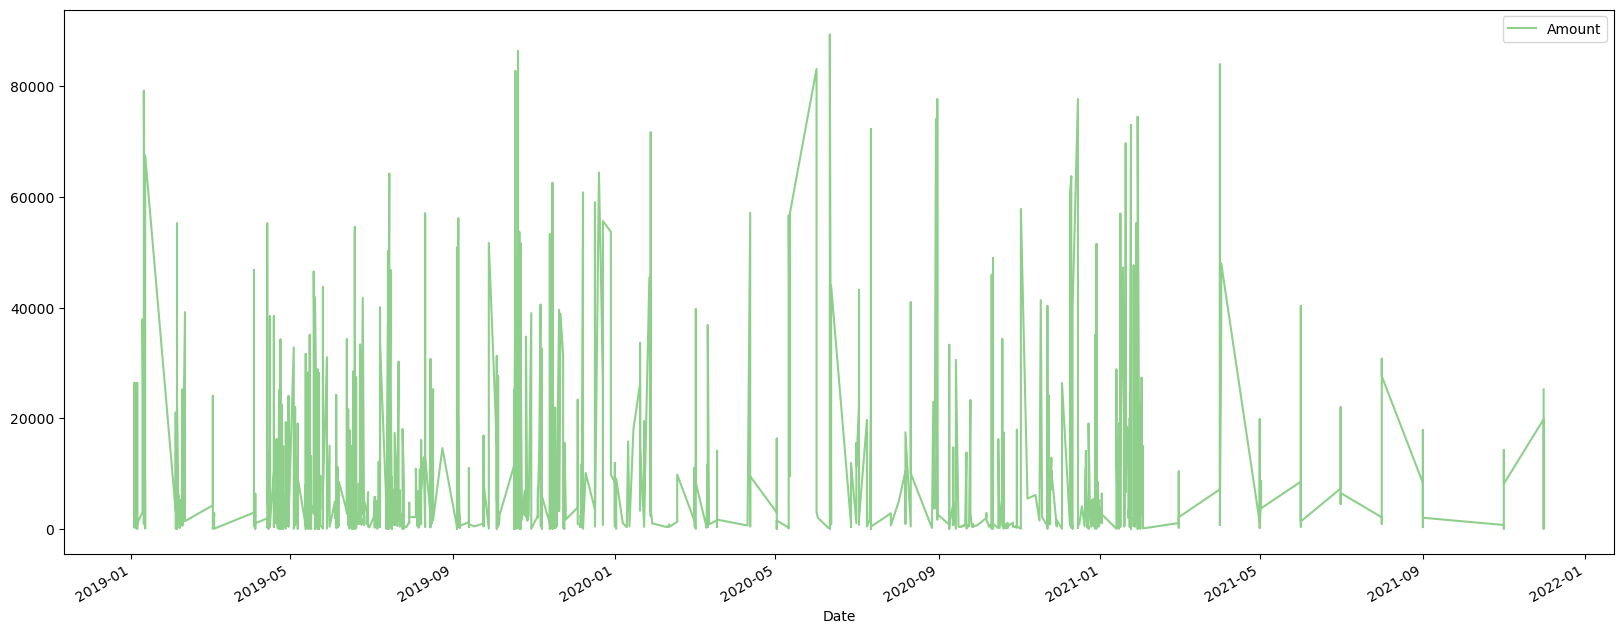

In [45]:
GREEN_COLORMAP = sns.color_palette("Greens")
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
df.plot(y='Amount', ax=ax, color=GREEN_COLORMAP[2])

NameError: name 'data1' is not defined

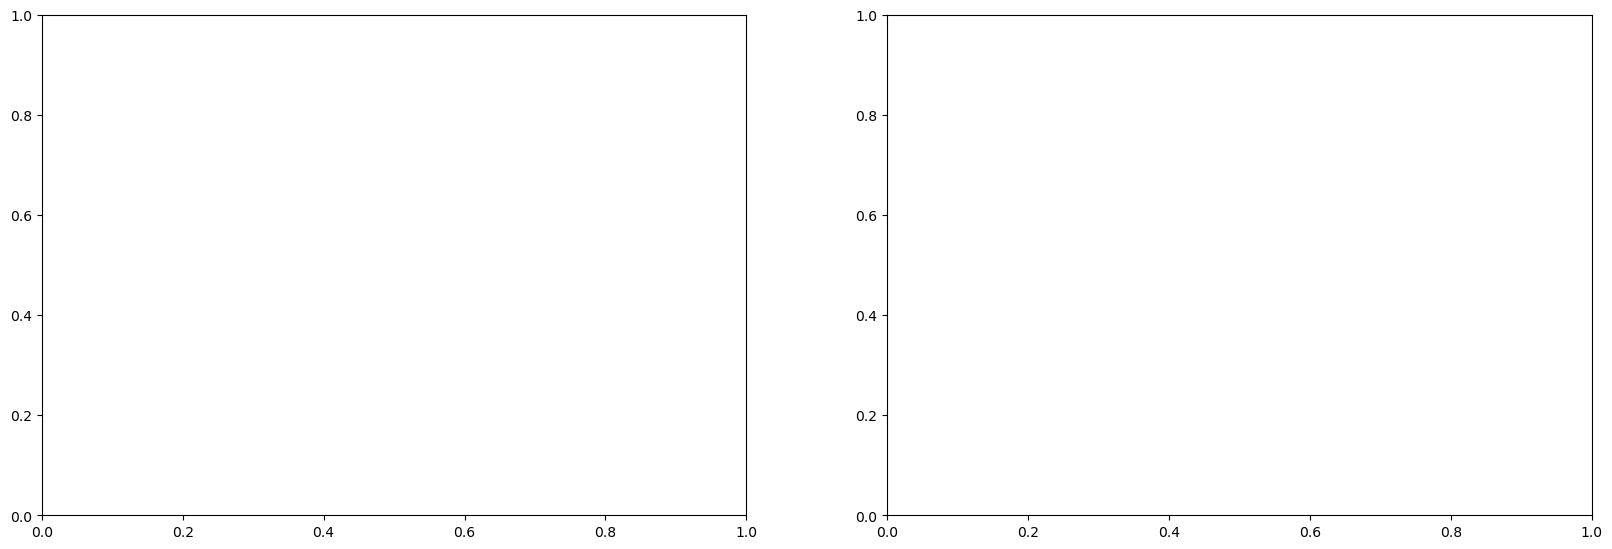

In [48]:
f, ax = plt.subplots(1,2,figsize=(20, 6.5))
sns.lineplot(x = Data1.index, y = data1,ax=ax[0])
sns.lineplot(x = Data2.index, y = data2,ax=ax[1])
plt.show()

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8

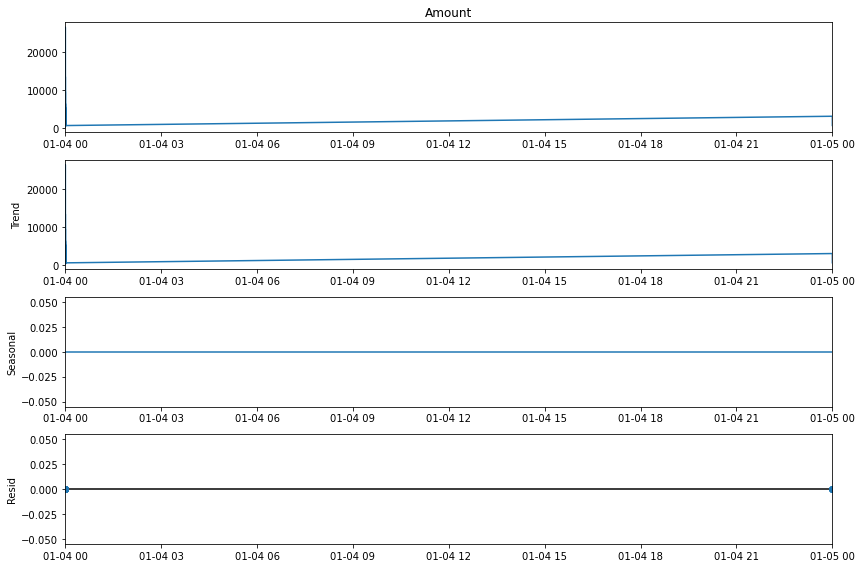

In [46]:
decomposition1 = sm.tsa.seasonal_decompose(df['Amount'][:50], model='additive',period=1)
decomposition1.plot()
plt.show()


-  there is contant  seasonality and residual shown by graph and little upword movement in trend and moving avg

In [ ]:
Gdata1= df.groupby('Date')['Amount'].mean().reset_index().copy()
Gdata2= df.groupby('Date')['Price_per_unit'].mean().reset_index().copy()
Gdata3= df.groupby('Date')['Quantity'].mean().reset_index().copy()

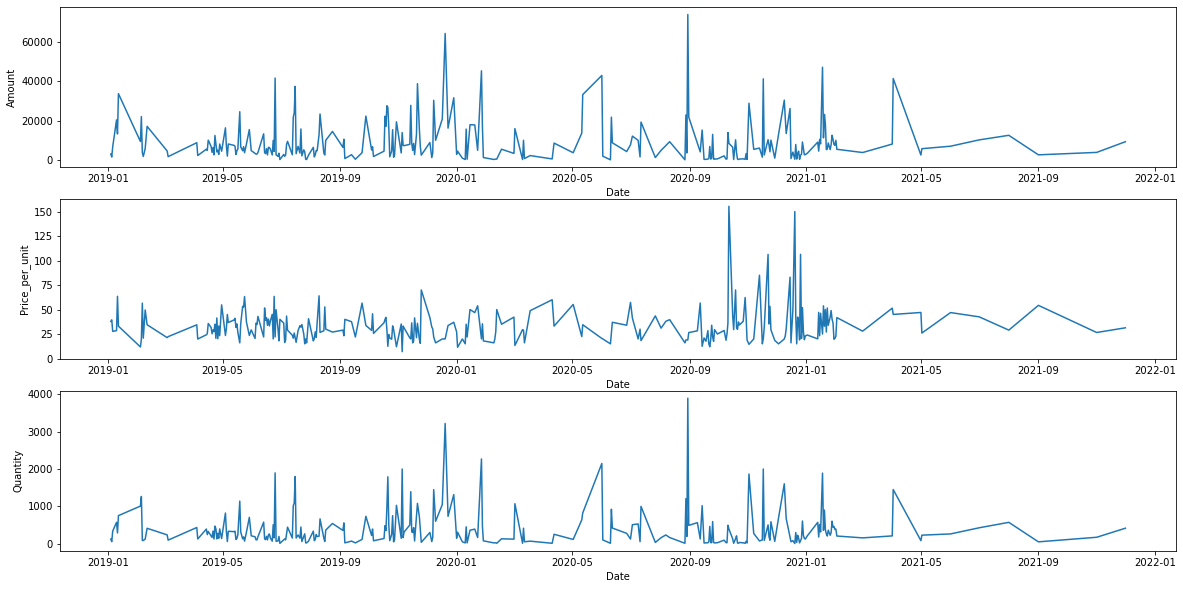

In [108]:
f, ax = plt.subplots(3,1,figsize=(20, 10))
sns.lineplot(x=Gdata1["Date"], y=Gdata1['Amount'],ax=ax[0])
sns.lineplot(x=Gdata2["Date"], y=Gdata2['Price_per_unit'],ax=ax[1])
sns.lineplot(x=Gdata3["Date"], y=Gdata3['Quantity'],ax=ax[2])
plt.show()

### Some observations: 
-  There  2019-09  to 2020-01 and 2020-09 to 2021-01 their is high fluctuation seen in price and quantity
- quantity range B/w 3900 to 0 
- price range B/w 150 to 0 
- revenue range B/w 80,000 to 0 
- higest revenue is earn in 2020-09 date and higest quantity is also sold that day.

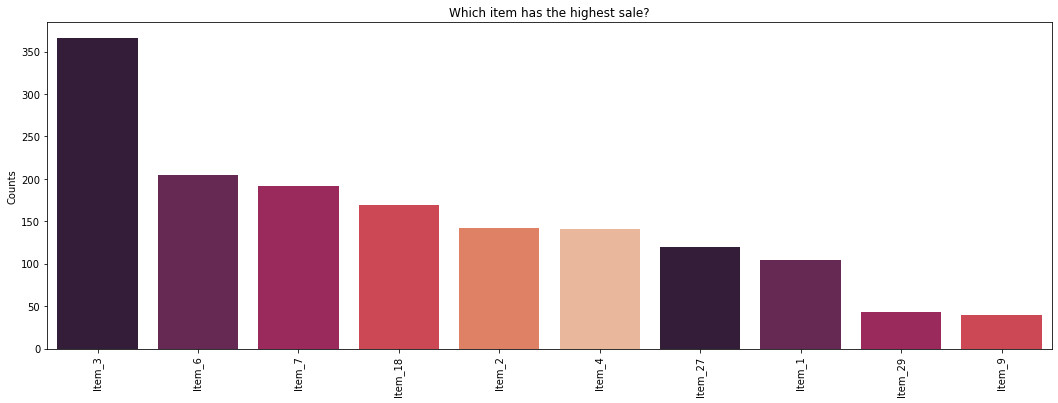

In [115]:
item_counts = df['Item_Name'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.color_palette("rocket"))
plt.ylabel("Counts")
plt.title("Which item has the highest sale?");
plt.xticks(rotation=90);

- item 3 is most popular product amoungs all the items. sale of item 3 is highest

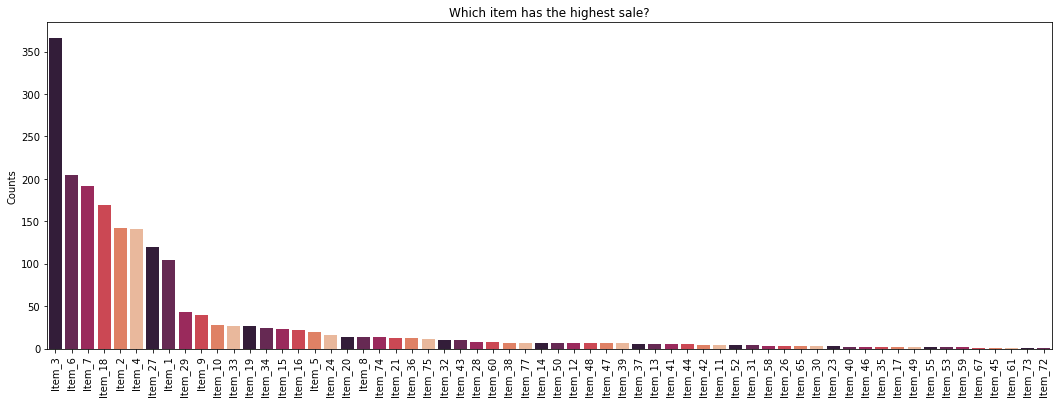

In [114]:
item_counts = df['Item_Name'].value_counts().sort_values(ascending=False).iloc[0:-15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.color_palette("rocket"))
plt.ylabel("Counts")
plt.title("Which item has the highest sale?");
plt.xticks(rotation=90);

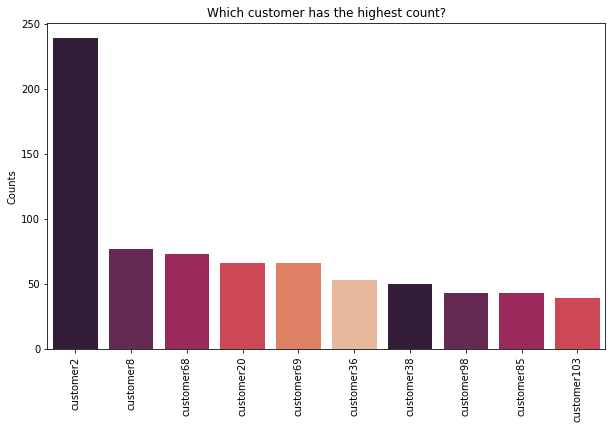

In [115]:
customer_name=df['Customer_Name'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(10,6))
sns.barplot(customer_name.index, customer_name.values, palette=sns.color_palette("rocket"))
plt.ylabel("Counts")
plt.title("Which customer has the highest count?");
plt.xticks(rotation=90);


-  customer 2 has higest no of count which means customer is most frequent customer 

In [116]:
#creating a dataframe with amount spend above 40000
customer = df[df['Amount']>=40000].groupby('Customer_Name').agg({'Amount':'sum',
                                                  'Quantity': 'sum',
                                                  'Price_per_unit': 'max'})


In [117]:
customer

,Amount,Quantity,Price_per_unit
Customer_Name,,,
customer103,107000,3140,50
customer106,353924,14265,50
customer110,53680,2440,22
customer114,57846,3732,15
customer12,167738,5862,49
customer131,40293,1831,22
customer133,129720,5640,23
customer15,49680,2484,20
customer17,97908,3219,65


### customer behaviour 

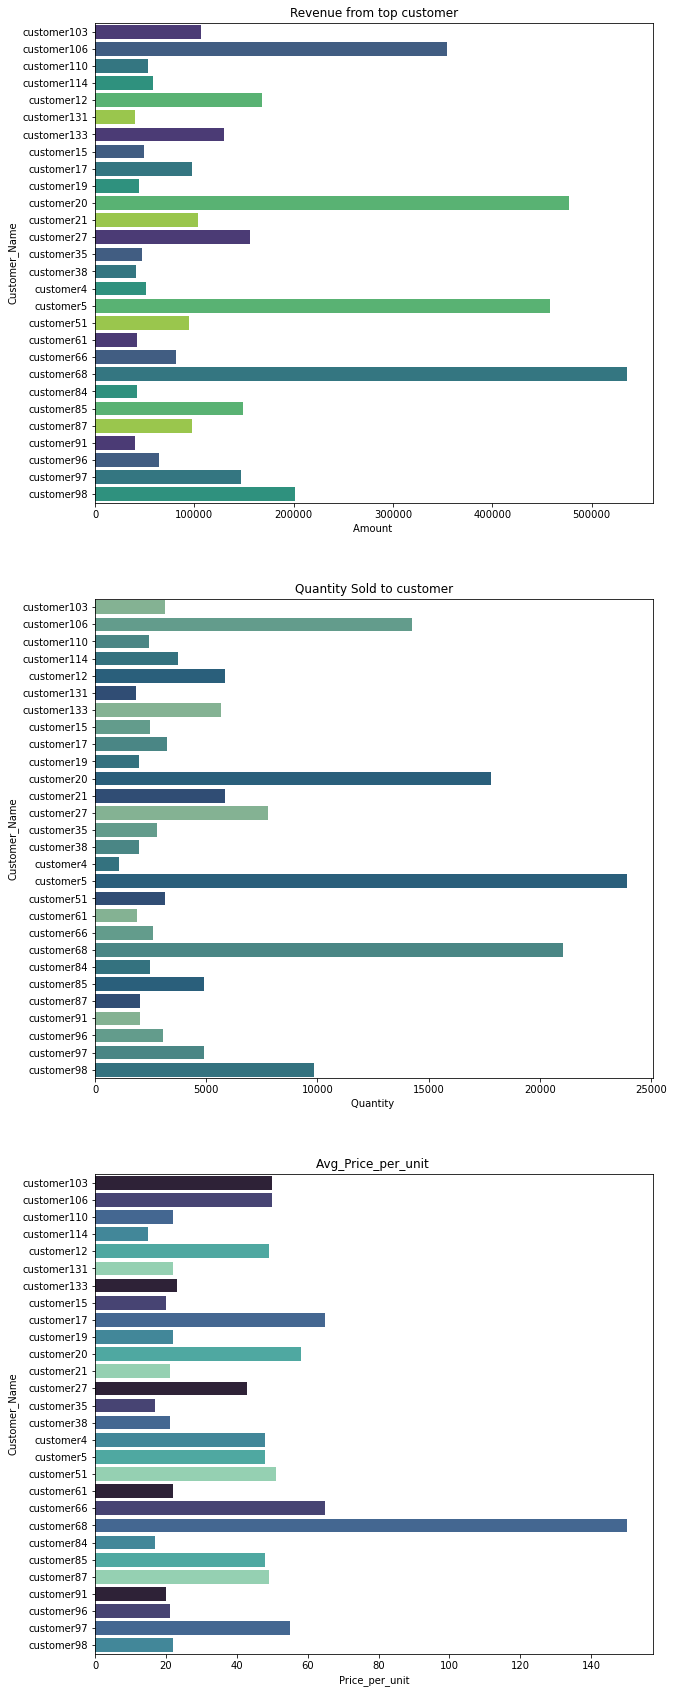

In [118]:
# Now, we are going to check customer behaviour 

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
g1 = sns.barplot(x=customer['Amount'], y=customer.index, alpha=1, ax=ax[0], palette = sns.color_palette("viridis"), orient='h')
ax[0].title.set_text('Revenue from top customer')
ax[0].set_xlabel("Amount ")


g2 = sns.barplot(x=customer['Quantity'], y=customer.index, alpha=1, ax=ax[1], palette=sns.color_palette("crest"),orient='h')
ax[1].title.set_text('Quantity Sold to customer')
ax[1].set_xlabel("Quantity ")


g3 = sns.barplot(x=customer['Price_per_unit'], y=customer.index, alpha=1, ax=ax[2], palette=sns.color_palette("mako"), orient='h')
ax[2].title.set_text('Avg_Price_per_unit ')
ax[2].set_xlabel("Price_per_unit")
plt.show()

# Some observations: 
- customer no 68 20 and 5 are  top 3 high revenue customer .
- customer no 5 20 and 68 also customer who purchase item in  large quantity. 
- customer 68  who buy high price product. 

### Items, Amt ,Quantity,Price 

In [79]:
item_values = df.groupby('Item_Name').agg({'Amount':'sum',
                                                  'Quantity': 'sum'}).sort_values(by=['Amount'],ascending=False).iloc[0:15]


In [80]:
item_values

,Amount,Quantity
Item_Name,,
Item_7,2728466,130551
Item_3,1970965,80998
Item_27,1824031,37051
Item_6,1625104,99095
Item_2,971241,43347
Item_18,706574,11119
Item_1,648787,32576
Item_29,352752,8833
Item_34,342058,5396


Text(0.5, 0, 'Quantity')

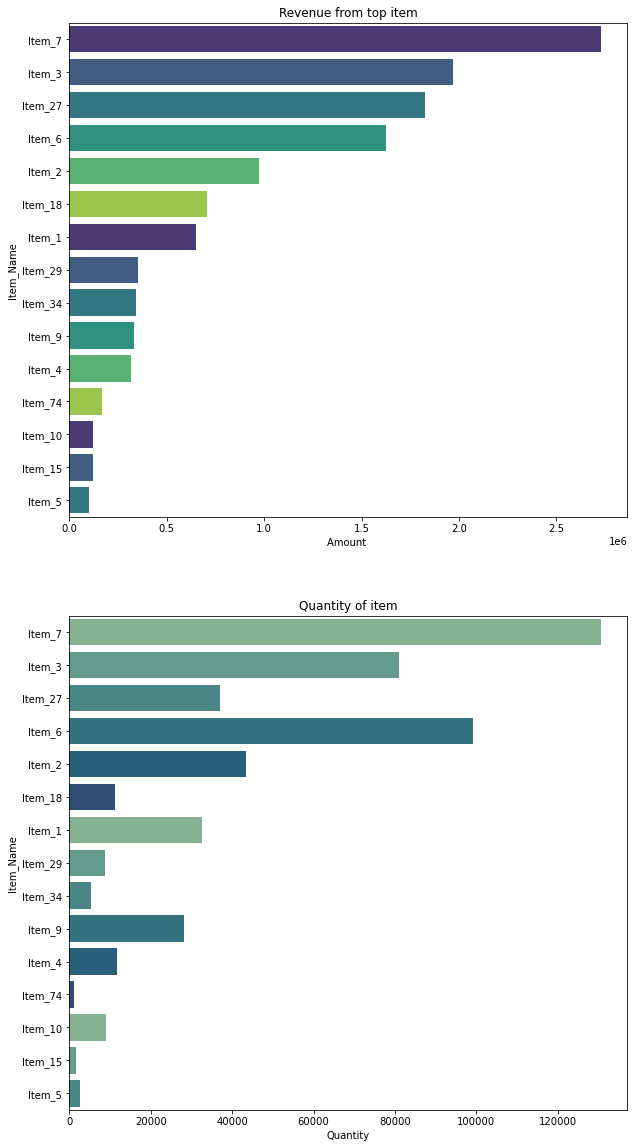

In [110]:

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,20))
g1 = sns.barplot(x=item_values['Amount'], y=item_values.index, alpha=1, ax=ax[0], palette = sns.color_palette("viridis"), orient='h')
ax[0].title.set_text('Revenue from top item')
ax[0].set_xlabel("Amount ")


g2 = sns.barplot(x=item_values['Quantity'], y=item_values.index, alpha=1, ax=ax[1], palette=sns.color_palette("crest"),orient='h')
ax[1].title.set_text('Quantity of item')
ax[1].set_xlabel("Quantity")



In [73]:
# maximum unit price of item no 73,72
df[df['Price_per_unit'].max() == df['Price_per_unit']][['Item_Name','Price_per_unit']]

,Item_Name,Price_per_unit
Date,,
2020-10-12,Item_73,1250


In [99]:
item = df.groupby('Item_Name').agg({'Price_per_unit': 'max'}).sort_values(by=['Price_per_unit'],ascending=False).iloc[0:15]


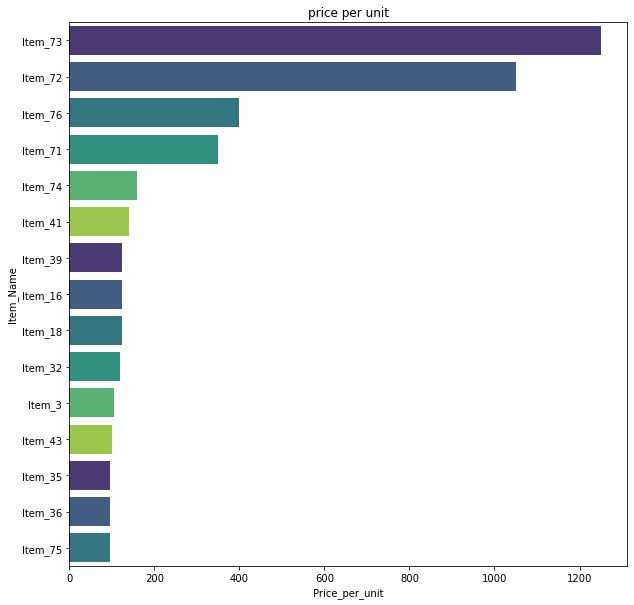

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.barplot(x=item['Price_per_unit'], y=item.index, alpha=1, palette = sns.color_palette("viridis"), orient='h')
ax.title.set_text('price per unit')

### Some observations: 
- item no 7,3 and 27 are the item which genrate large amt of revenue.
- item_7 and 6 , 3  has sold in large quantity . one reason can be for low price.
- maximum unit price of item no 73,72 . also less demand items .

In [51]:
df.to_csv('final.csv')

In [ ]:
create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = df.groupby('Customer_Name')..min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()

#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
plot_data = [
    go.Scatter(
        x=tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=tx_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [53]:
df.columns

Index(['Customer_Name', 'Item_Name', 'Vrh_No', 'Quantity', 'Price_per_unit',
       'Amount'],
      dtype='object')